# Playground

In [1]:
import sys
import struct
import redis
import numpy as np
import math
import matplotlib.pyplot as plt
sys.path.append('../')

In [2]:
r = redis.Redis(host='localhost', port=6379, db=0)

In [3]:
keys = r.keys("TEST:*")
keys

[b'TEST: FN_thres_32_pool_2',
 b'TEST: FN_thres_65536_pool_6',
 b'TEST: AvgPass_thres_128_pool_5',
 b'TEST: FP_thres_2048_pool_4',
 b'TEST: Recall_thres_2048_pool_4',
 b'TEST: Throughput_thres_1_pool_5',
 b'TEST: Throughput_thres_262144_pool_5',
 b'TEST: Recall_thres_4096_pool_5',
 b'TEST: TotalTime_thres_4_pool_5',
 b'TEST: FP_thres_512_pool_4',
 b'TEST: Recall_thres_32_pool_4',
 b'TEST: TotalTime_thres_262144_pool_3',
 b'TEST: Throughput_thres_512_pool_2',
 b'TEST: Acc_thres_32_pool_4',
 b'TEST: AvgPass_thres_4_pool_2',
 b'TEST: FP_thres_256_pool_5',
 b'TEST: Loss_thres_2048_pool_6',
 b'TEST: Precision_thres_256_pool_2',
 b'TEST: Loss_thres_512_pool_5',
 b'TEST: TP_thres_2048_pool_3',
 b'TEST: AvgPass_thres_8192_pool_5',
 b'TEST: Acc_thres_2048_pool_2',
 b'TEST: FP_thres_2048_pool_2',
 b'TEST: Precision_thres_128_pool_5',
 b'TEST: AvgPass_thres_65536_pool_4',
 b'TEST: Throughput_thres_16384_pool_6',
 b'TEST: AvgPass_thres_2_pool_5',
 b'TEST: TP_thres_4_pool_2',
 b'TEST: TP_thres_1310

In [4]:
def avg(lst):
    sum = 0
    for i in lst:
        sum += float(i.decode("utf-8"))
    return sum / len(lst)

## Results

## Average

In [7]:
loss = {}
recall = {}
precision = {}
throughput = {}
total_time = {}
avg_pass_time = {}


thr_list = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144]
for i in range(2, 6+1):
    loss[i] = [avg(r.lrange(f'TEST: Loss_thres_{thr}_pool_{i}', 0, -1)) for thr in thr_list]
    recall[i] = [avg(r.lrange(f'TEST: Recall_thres_{thr}_pool_{i}', 0, -1)) for thr in thr_list]
    precision[i] = [avg(r.lrange(f'TEST: Precision_thres_{thr}_pool_{i}', 0, -1)) for thr in thr_list]
    throughput[i] = [avg(r.lrange(f'TEST: Throughput_thres_{thr}_pool_{i}', 0, -1)) for thr in thr_list]
    total_time[i] = [avg(r.lrange(f'TEST: TotalTime_thres_{thr}_pool_{i}', 0, -1)) for thr in thr_list]
    avg_pass_time[i] = [avg(r.lrange(f'TEST: AvgPass_thres_{thr}_pool_{i}', 0, -1)) for thr in thr_list]


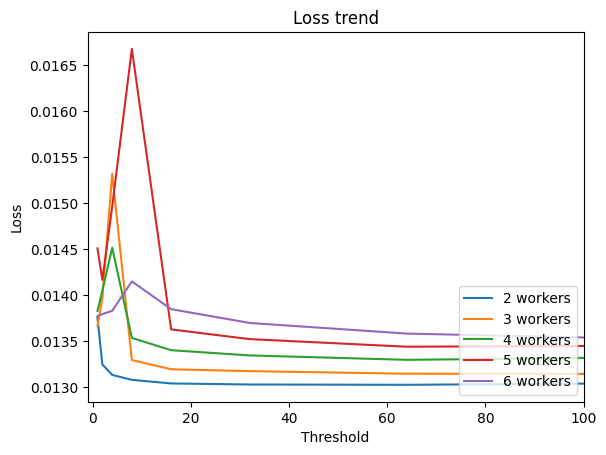

In [14]:
plt.plot(thr_list, loss[2], scalex=[0, 50000], label='2 workers')
plt.plot(thr_list, loss[3], scalex=[0, 50000], label='3 workers')
plt.plot(thr_list, loss[4], scalex=[0, 50000], label='4 workers')
plt.plot(thr_list, loss[5], scalex=[0, 50000], label='5 workers')
plt.plot(thr_list, loss[6], scalex=[0, 50000], label='6 workers')
plt.xlim(-1, 100)
plt.xlabel('Threshold')
plt.ylabel('Loss')
plt.title('Loss trend')
plt.legend(loc="lower right")
plt.show()

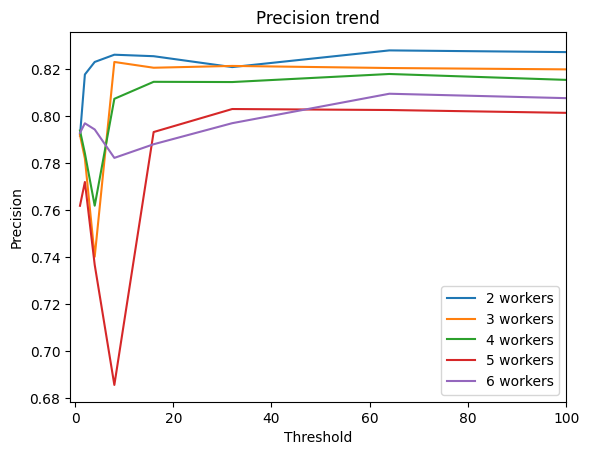

In [16]:
plt.plot(thr_list, precision[2], scalex=[0, 50000], label='2 workers')
plt.plot(thr_list, precision[3], scalex=[0, 50000], label='3 workers')
plt.plot(thr_list, precision[4], scalex=[0, 50000], label='4 workers')
plt.plot(thr_list, precision[5], scalex=[0, 50000], label='5 workers')
plt.plot(thr_list, precision[6], scalex=[0, 50000], label='6 workers')
plt.xlim(-1, 100)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision trend')
plt.legend(loc="lower right")
plt.show()

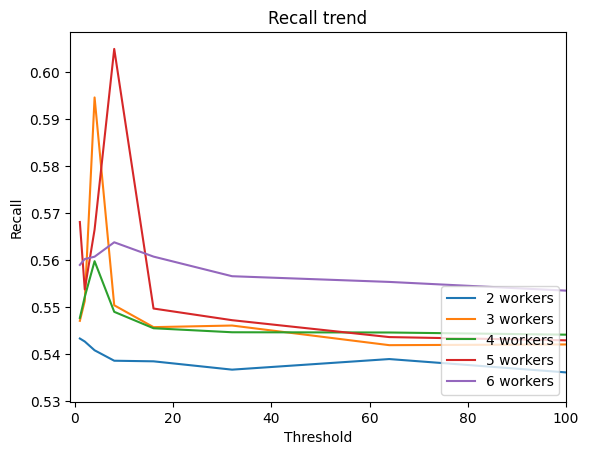

In [15]:
plt.plot(thr_list, recall[2], scalex=[0, 50000], label='2 workers')
plt.plot(thr_list, recall[3], scalex=[0, 50000], label='3 workers')
plt.plot(thr_list, recall[4], scalex=[0, 50000], label='4 workers')
plt.plot(thr_list, recall[5], scalex=[0, 50000], label='5 workers')
plt.plot(thr_list, recall[6], scalex=[0, 50000], label='6 workers')
plt.xlim(-1, 100)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall trend')
plt.legend(loc="lower right")
plt.show()

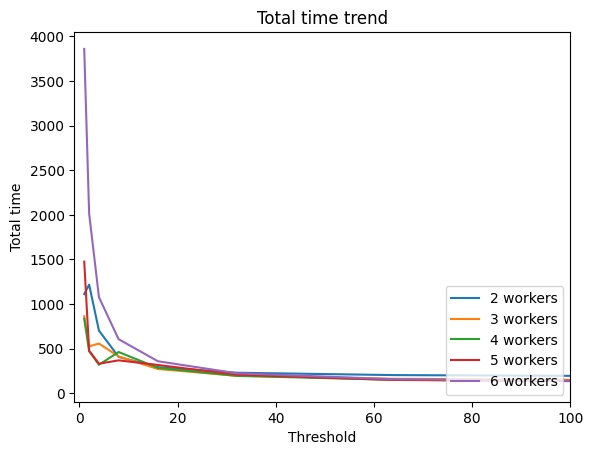

In [17]:
plt.plot(thr_list, total_time[2], scalex=[0, 50000], label='2 workers')
plt.plot(thr_list, total_time[3], scalex=[0, 50000], label='3 workers')
plt.plot(thr_list, total_time[4], scalex=[0, 50000], label='4 workers')
plt.plot(thr_list, total_time[5], scalex=[0, 50000], label='5 workers')
plt.plot(thr_list, total_time[6], scalex=[0, 50000], label='6 workers')
plt.xlim(-1, 100)
plt.xlabel('Threshold')
plt.ylabel('Total time')
plt.title('Total time trend')
plt.legend(loc="lower right")
plt.show()

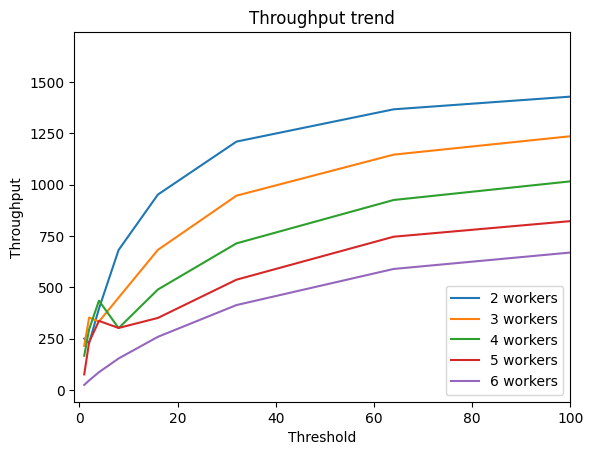

In [18]:
plt.plot(thr_list, throughput[2], scalex=[0, 50000], label='2 workers')
plt.plot(thr_list, throughput[3], scalex=[0, 50000], label='3 workers')
plt.plot(thr_list, throughput[4], scalex=[0, 50000], label='4 workers')
plt.plot(thr_list, throughput[5], scalex=[0, 50000], label='5 workers')
plt.plot(thr_list, throughput[6], scalex=[0, 50000], label='6 workers')
plt.xlim(-1, 100)
plt.xlabel('Threshold')
plt.ylabel('Throughput')
plt.title('Throughput trend')
plt.legend(loc="lower right")
plt.show()

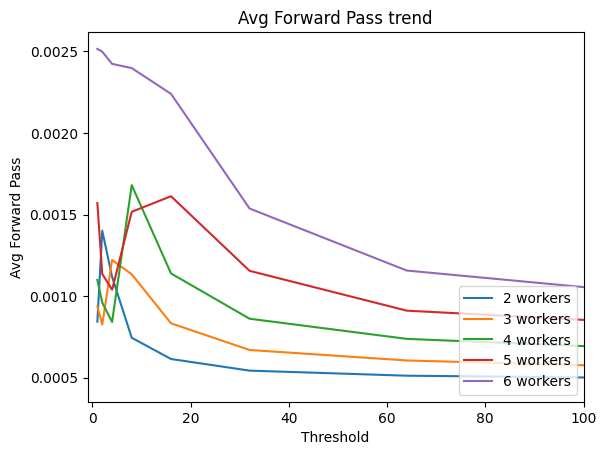

In [19]:
plt.plot(thr_list, avg_pass_time[2], scalex=[0, 50000], label='2 workers')
plt.plot(thr_list, avg_pass_time[3], scalex=[0, 50000], label='3 workers')
plt.plot(thr_list, avg_pass_time[4], scalex=[0, 50000], label='4 workers')
plt.plot(thr_list, avg_pass_time[5], scalex=[0, 50000], label='5 workers')
plt.plot(thr_list, avg_pass_time[6], scalex=[0, 50000], label='6 workers')
plt.xlim(-1, 100)
plt.xlabel('Threshold')
plt.ylabel('Avg Forward Pass')
plt.title('Avg Forward Pass trend')
plt.legend(loc="lower right")
plt.show()

In [ ]:

plt.plot([8, 1024, 16384], [0.5722217626041837, 0.5588629576894972, 0.5657797323332893], label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Recall trend')
plt.legend(loc="lower right")
plt.show()